In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score

In [3]:

bank_df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [4]:
bank_df.describe().transpose()
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:

sns.pairplot(data=bank_df,x_vars=bank_df.drop(['Personal Loan'],axis=1),y_vars=bank_df['Personal Loan'])

In [5]:
bank_df.isna().sum()

## There's no missing values such as NA or NAN

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
###bank_df.drop(['ZIP Code'],axis=1,inplace=True)
corr = bank_df.corr()


In [41]:
## To view how the columns are correlated to each other
bank_df.corr()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


From my findings, Independent variables such as Age & Experience are highly correlated
Likewise Income & CCAvg , Income & Personal Loan are moderately correlated


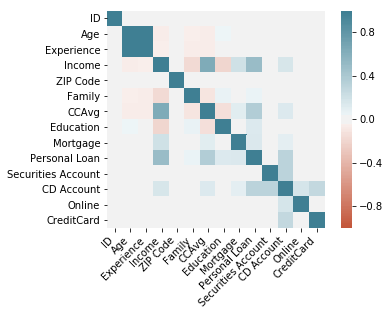

In [8]:
## Finding the correlation using Heat Map

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

print('From my findings, Independent variables such as Age & Experience are highly correlated')
print('Likewise Income & CCAvg , Income & Personal Loan are moderately correlated')


In [9]:
##Analyzing data distribution for each attrubute

94720    169
94305    127
95616    116
90095     71
93106     57
Name: ZIP Code, dtype: int64

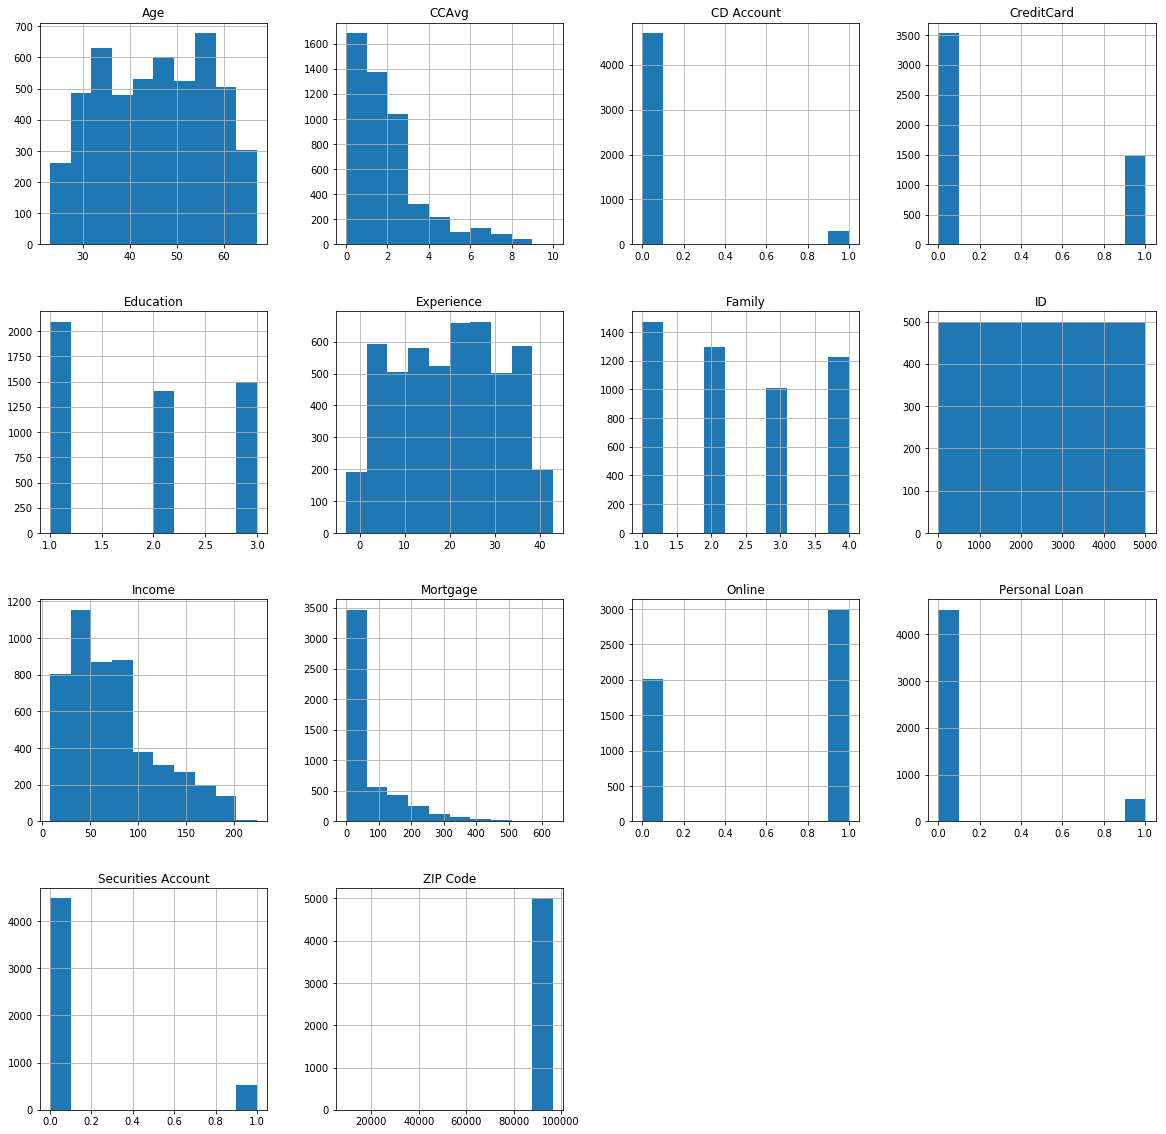

ID is no longer help to predict the result, we can drop ID from DataFrame
Need to convert Zip code to meaning value
As Age & Experience are highly correlated we can remove Age/Experience
Income, Mortgage & CcAvg are right skewed


In [5]:
bank_df.hist(figsize=(20,20))
plt.show()

print('ID is no longer help to predict the result, we can drop ID from DataFrame')
print('Need to convert Zip code to meaning value')
print('As Age & Experience are highly correlated we can remove Age/Experience')
print('Income, Mortgage & CcAvg are right skewed')

In [6]:
## Analyzing Zip code, Seeing Zip code as categorical value. So I want to convert this in to meaning value 
## to get better accuracy. 

#Applying Mean Target Encoding to ZIP Code variable
bank_df['ZIP Code'].value_counts().head()

94720    169
94305    127
95616    116
90095     71
93106     57
Name: ZIP Code, dtype: int64

In [7]:
bank_df['ZIP Code']=bank_df['ZIP Code'].map(bank_df.groupby('ZIP Code')['Personal Loan'].mean())

In [8]:
print('ZIP Code after appliying Mean/Target Encoding')
bank_df.head(5)



ZIP Code after appliying Mean Encoding


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,0.120000,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,0.173913,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,0.112426,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,0.000000,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,0.065217,4,1.0,2,0,0,0,0,0,1


In [9]:
##Dropping the variables which are not required or it may mislead to predict accuracy

bank_df.drop(['ID','Mortgage'],axis=1,inplace=True)

In [10]:
bank_df.drop(['Age'],axis=1,inplace=True)

In [11]:
bank_df.head()


## Assign X & Y axis (target & feature variables)

## Personal Loan is the target variable here
X=bank_df.drop(['Personal Loan'],axis=1)
Y=bank_df['Personal Loan']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(3500, 10)
(1500, 10)


In [22]:
bank_df.shape

(5000, 11)

In [13]:
##Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))
print("The accuracy score is")
metrics.accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.91      0.55      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.77      0.83      1500
weighted avg       0.95      0.95      0.94      1500

[[1343    8]
 [  67   82]]
The accuracy score is


0.95

In [121]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

##bank_df['ZIP Code']=le.fit_transform(bank_df['ZIP Code'].astype('int64'))
##bank_df['CCAvg']=le.fit_transform(bank_df['CCAvg'].astype('int64'))



In [35]:
## KNN Classifier

from sklearn.model_selection import train_test_split
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=1)
print(X_trainKNN.shape)
print(X_testKNN.shape)

(3500, 10)
(1500, 10)


In [37]:
from sklearn import metrics

n=[3,5,7,10]

for num in n:
    NNH = KNeighborsClassifier(n_neighbors=num)
    NNH.fit(X_trainKNN,y_trainKNN)
    PredictKNN=NNH.predict(X_testKNN)
    expectedKNN=y_testKNN
    print("Accuracy score for k = ", num ," ", metrics.accuracy_score(y_testKNN, PredictKNN))

Accuracy score for k =  3   0.9246666666666666
Accuracy score for k =  5   0.93
Accuracy score for k =  7   0.918
Accuracy score for k =  10   0.914


In [43]:

## Getting best accuracy when N_neigbours=5
NNH = KNeighborsClassifier(n_neighbors=5)
NNH.fit(X_trainKNN,y_trainKNN)
PredictKNN=NNH.predict(X_testKNN)
expectedKNN=y_testKNN
print("Accuracy score for k = 5 is ", metrics.accuracy_score(y_testKNN, PredictKNN))

Accuracy score for k = 5 is  0.93


In [44]:
print(metrics.classification_report(expectedKNN, PredictKNN))
print(metrics.confusion_matrix(expectedKNN, PredictKNN))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.74      0.46      0.56       149

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.84      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500

[[1327   24]
 [  81   68]]


In [ ]:
## Naive Bayes

In [15]:


from sklearn.model_selection import train_test_split
X_trainNB, X_testNB, y_trainNB, y_testNB = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=1)

In [16]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_trainNB, y_trainNB)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
expected = y_testNB
predicted = model.predict(X_testNB)

In [34]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1351
           1       0.45      0.54      0.49       149

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.74      0.72      1500
weighted avg       0.90      0.89      0.89      1500

[[1253   98]
 [  68   81]]


In [21]:
print('Accuracy score using Naive Bayes',metrics.accuracy_score(y_testNB, predicted))

Accuracy score using Naive Bayes 0.8893333333333333


Conclusion : When comaparing the three models(Logistic,KNN & Naive Bayes) confusion matrix & accuracy score, Logistic regression outperforms well . In Thera Bank dataset, Type 2 Error should be minimal (i.e Prediction is negative but Actual is Positive).  Type II Error is minimal in Logistic regression when compared to KNN & Naive Bayes.
